In [4]:
import networkx as nx
import numpy as np
import scipy as sp
import community
import matplotlib.pyplot as plt


# Likelihoods of Erdős-Rényi and configuration models for a random network

In [107]:
def log2_factorial(n):
    return sp.special.loggamma(n+1)/np.log(2.)

def log2_double_factorial(n):
    if n % 2 == 0:
        k = n/2
        return k + log2_factorial(k)
    else:
        k = (n+1)/2
        return (log2_factorial(2.*k - 1.) - log2_factorial(k - 1.)) - k + 1 

def entropy_simple_ER(G):    
    N = G.number_of_nodes()
    E = G.number_of_edges()
    
    return log2_factorial( N*(N-1)/2. ) - log2_factorial(E) - log2_factorial( N*(N-1)/2. - E )

def entropy_CM(G):
    N = G.number_of_nodes()
    E = G.number_of_edges()
    degrees = [d for n, d in G.degree()]
    A = nx.to_numpy_array(G_i)
    
    return log2_factorial(2*E) - log2_double_factorial(2*E) - np.sum([log2_factorial(d) for d in degrees]) - np.sum(log2_factorial(A))/2.


In [108]:
N = 200
p = 0.1
E = N*(N-1)*p/2
M = 200

l_ER = []
l_CM = []
differences = []

for m in range(M):
    G_i = nx.gnm_random_graph(N,E)
    l_ER.append(-entropy_simple_ER(G_i))
    l_CM.append(-entropy_CM(G_i))
    differences.append(entropy_simple_ER(G_i)-entropy_CM(G_i))
    
    

Text(0, 0.5, 'count')

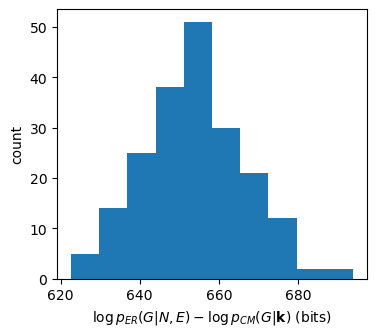

In [109]:
fig, ax = plt.subplots(1,1,figsize=(4,3.5),dpi=100)

ax.hist(np.array(differences))
ax.set_xlabel(r'$\log p_{ER}(G|N,E) - \log p_{CM}(G|\mathbf{k})$ (bits)')
ax.set_ylabel('count')

# Codelengths of Erdős-Rényi and configuration models for a random network

In [114]:
def L_N(n):
    return np.log2( n*(n+1) )

def complexity_ER(G):
    N = G.number_of_nodes()
    E = G.number_of_edges()
    
    return L_N(N) + L_N(E)

def complexity_CM(G):
    N = G.number_of_nodes()
    E = G.number_of_edges()
    degrees = [d for n, d in G.degree()]
    delta = np.min(degrees)
    Delta = np.max(degrees)
    
    return L_N(N) + L_N(delta)  + L_N(Delta) + N*np.log2(Delta - delta + 1)

def codelength_simple_ER(G):
    return entropy_simple_ER(G_i) + complexity_ER(G_i)

def codelength_CM(G):
    return entropy_CM(G_i) + complexity_CM(G_i)


In [115]:
N = 200
p = 0.1
E = N*(N-1)*p/2
   
G_i = nx.gnm_random_graph(N,E)

L_sER = codelength_simple_ER(G_i)
L_CM = codelength_CM(G_i)

print('codelengths: ER:', L_sER , 'CM:', L_CM)

print ('Codelength difference', L_sER - L_CM)

codelengths: ER: 9363.49596656749 CM: 9622.424998802187
Codelength difference -258.92903223469693


In [112]:
N = 200
p = 0.1
E = N*(N-1)*p/2
M = 200

L_sER = []
L_CM = []
differences = []

for m in range(M):
    G_i = nx.gnm_random_graph(N,E)
    L_sER.append(codelength_simple_ER(G_i))
    L_CM.append(codelength_CM(G_i))    

Text(0, 0.5, 'count')

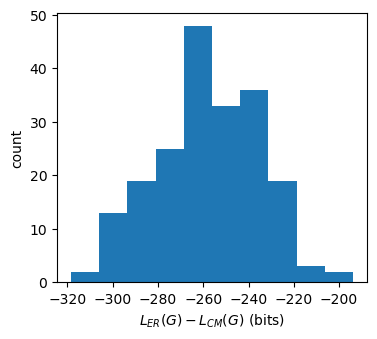

In [113]:
fig, ax = plt.subplots(1,1,figsize=(4,3.5),dpi=100)

ax.hist(np.array(L_ER) - np.array(L_CM))
ax.set_xlabel(r'$L_{ER}(G) - L_{CM}(G)$ (bits)')
ax.set_ylabel('count')